In [12]:
import pandas as pd
import statsmodels
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPRegressor
import pandas as pd
import matplotlib.pyplot as plt
import pyrenn as prn
from sklearn.linear_model import LinearRegression
from fireTS.models import NARX
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [13]:
df=pd.read_excel(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\36349\36349.xlsx', parse_dates=['date'],  index_col='date')

In [14]:
df

,gwl,precipitation
date,,
1989-09-01,-68.650,0.000000
1989-10-01,-68.830,33.000000
1989-11-01,-68.920,146.211937
1989-12-01,-68.890,135.618380
1990-01-01,-68.860,46.000000
...,...,...
2017-10-01,-70.315,84.320000
2017-11-01,-70.610,91.680000
2017-12-01,-70.460,88.630000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000209BB79A548>,
      dtype=object)

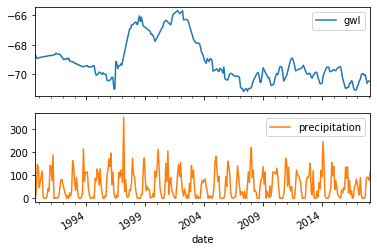

In [15]:
df.plot(subplots=True)

In [16]:
#define X and y 

y_train= df.iloc[0:283,0:1].values 
print(y_train.shape)
X_train= df.iloc[0:283, 1:2].values  
print(X_train.shape) 

y_val= df.iloc[283:343,0:1].values 
print(y_val.shape)
X_val= df.iloc[283:343, 1:2].values  
print(X_val.shape) 

y_test= df.iloc[344:,0:1].values 
print(y_test.shape)
X_test= df.iloc[344:, 1:2].values  
print(X_test.shape) 


(283, 1)
(283, 1)
(59, 1)
(59, 1)
(0, 1)
(0, 1)


Build the Narx Model

In [17]:
narx_mdl = NARX(LinearRegression(), auto_order=6, exog_order=[1], exog_delay=[0])

In [18]:
narx_mdl.fit(X_train, y_train.ravel())

Predict

In [19]:
ypred_narx = narx_mdl.predict(X_val, y_val.ravel(), step=6)
ypred_narx = pd.Series(ypred_narx)

In [20]:

y_val.plot(label='actual')
ypred_narx.plot(label='6-step-ahead prediction')
plt.legend()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

Forecast

In [21]:

forecast_step = 6
yforecast_narx = narx_mdl.forecast(X_test.iloc[:-forecast_step, :], 
                                   y_test.iloc[:-forecast_step], 
                                   step=forecast_step, 
                                   X_future=Xtest.iloc[-forecast_step:-1, :])

yforecast_narx = pd.Series(yforecast_narx, index=ytest.index[-forecast_step:])

# When forecast step and predict step are equal (in this case it is 6), 
# the 6th forecast value from 6 step before should be the same as the 
# predicted value of the last value in ytest. 
# (There is some numeric error in my implementation though.)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
#define NARX Model
mdl = NARX(MLPRegressor(),auto_order=1,
    exog_order=[1],
    exog_delay=[1])
#mdl.fit(X_train, y_train)

In [ ]:
#fit data
mdl.fit(y_train, X_train)

In [ ]:
#predictions
# Use the forest's predict method on the test data
predictions = mdl.predict(X_val, y_val, step=3)

In [ ]:
predictions = np.reshape(predictions,(60, 1))

In [ ]:
predictions
 

In [ ]:
print(predictions.shape)

In [ ]:
print(y_val.shape)


In [ ]:
#save
np.savetxt(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\36349\y_val.csv', y_val, delimiter=',', fmt='%s')

In [ ]:
y_val= pd.read_excel(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\36349\y_val.xlsx')

In [ ]:
print(y_val.shape)

In [ ]:
np.savetxt(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\36349\predictions.csv', predictions, delimiter=',', fmt='%s')

In [ ]:
predictions=pd.read_excel(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\36349\y_val.xlsx')

In [ ]:
val=pd.read_excel(r'C:\Users\Kirsty\Desktop\Steenkoppies Data\36349\validation.xlsx')

In [ ]:
val.shape

In [ ]:
num= val.iloc[0:,0:1].values 
print(num.shape)
y_val= val.iloc[0:,1:2].values 
print(y_val.shape)
predictions= val.iloc[0:, 2:3].values  
print(predictions.shape) 

In [33]:
# Performance metrics
from sklearn import metrics
#Accuracy_on_train=mdl.score(X_train, y_train)
#Accuracy_on_val=mdl.score(X_val, y_val)
#print('Accuracy on training data (R^2)',Accuracy_on_train)
#print('Accuracy on validation data(R^2)',Accuracy_on_val)
MAE=metrics.mean_absolute_error (y_val, predictions)
print('Mean Absolute Error:', MAE)
MedianAE=metrics.mean_squared_error (y_val, predictions)
print('Mean Squared Error:', MedianAE)
RMSE=np.sqrt(metrics.mean_squared_error(y_val, predictions))
print ('Root Mean Squared Error:',RMSE)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

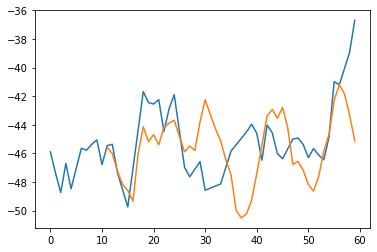

In [37]:
plt.plot(y_val)
plt.plot(predictions)

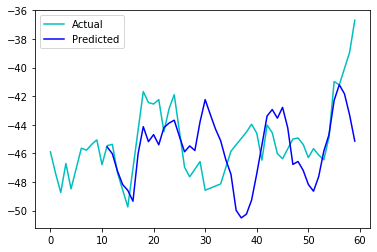

In [38]:
#Plot results
x_ax = range(len(X_val))
plt.plot(x_ax, y_val[:,0], label="Actual", color='c')
plt.plot(x_ax, predictions, label="Predicted", color='b')
#plt.plot(x_ax, y_val[:,1], label="y2-val", color='m')
#plt.plot(x_ax, predictions, label="y2-pred", color='r')
plt.legend()
plt.show()

In [ ]:
mdl1 = NARX(
    RandomForestRegressor(n_estimators=10),
    auto_order=2,
    exog_order=[2, 2],
    exog_delay=[1, 1])

In [ ]:
from fireTS.models import NARX
from sklearn.ensemble import RandomForestRegressor
import numpy as np

x = np.random.randn(100, 1)
y = np.random.randn(100)

# DirectAutoRegressor can do grid search as well
mdl = NARX(RandomForestRegressor(), auto_order=2, exog_order=[2], exog_delay=[1])

# Grid search
para_grid = {'n_estimators': [10, 30, 100]}
mdl.grid_search(x, y, para_grid, verbose=2)

# Best hyper-parameters are set after grid search, print the model to see the difference
print(mdl)

# Fit the model and make the prediction
mdl.fit(x, y)
ypred = mdl.predict(x, y, step=3)